In [203]:
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
import os
os.environ
os.chdir("/Users/rebeccalaser/Desktop/Pitt Spring 2022")
%run APIkeys.py
edamam_id = os.environ['EDAMAM_API_id']
edamam_key = os.environ['EDAMAM_API_key']

API keys loaded


# Part 1: Preparation
## Finding the Data
First, we need to obtain cereals to analyze. To find cereals, we took a few different approaches to obtain different cereals' nutritional facts. The first was looking up cereal brand in a UPI search website. We will use the Edamam API for obtaining the information we need about these cereals. The brands that we looked up were General Mills and Kellogg's.

In [204]:
GMshelf = [ "016000122543","016000141551","016000141568","016000275324","016000124998","016000151253","016000151963","016000141599","016000275492"]
kellshelf = ["038000779008", "038000991608", "038000916106", "038000198519","038000148101","038000768620","038000908408"]
kellshelf2 = ['038000138300','038000749469','038000267543','038000530548','038000289149']

In [205]:
GE_WF_UPCSs = ["016000124790", "016000122543", "016000125063", "016000123991", "016000487727", "030000060834", "016000124950", "016000125933", "016000275157", "016000124998", "16000487949", "30000063224", "884912004710", "16000487932", "884912014269", "30000063545", "884912129659", "16000103719", "38000199240", "38000198717", "884912111715", "884912249265", "16000126855", "884912126115", "884912002372", "38000200458", "30000064306", "884912102102", "16000152335", "884912116505", "16000275638", "43000129715", "16000157811", "38000787041", "21908455563", "43000129517", "884912126016", "30000061534", "30034019082", "884912249272", "13562002474", "884912117625", "43000014271", "884912114600", "38000200663"]

In [206]:
added = {
    'ENERC_KCAL':[170.0,150.0,200.0,150.0,240.0, 150.0],
    'FAT':[4.5,1.0,5.0,1.5,7.0,1.5],
    'FASAT':[1.5,0.0,1.0,0.0,6.5,0.0],
    'FATRN':[0.0,0.0,0.0,0.0,0.0,0.0],
    'FIBTG':[3.0,2.0,3.0,4.0,6.0,4.0],
    'SUGAR':[9.0,10.0,11.0,9.0,6.0,9.0],
    'SUGAR.added':[9.0,10.0,11.0,7.0,6.0,7.0],
    'NA':[170.0,110.0,140.0,180.0,100.0,190.0],
    'CHOCDF':[31.0,35.0,35.0,34.0,39.0,34.0],
    'PROCNT':[3.0,3.0,4.0,2.0,6.0,2.0],
    'CA':[0.0,0.0,22.0,7.0,20.0,0.0],
    'FE':[1.0,1.0,2.0,1.0,1.0,1.0],
    'K':[0.0,0.0,160.0,85.0,0.0,85.0],
    'servingSize_cup':[1.0,1.0,1.0,1.0,1.0,1.0],
    'servingSize_gram':[40.0,40.0,55.0,40.0,55.0,40.0],
    'label':["PANDA PUFFS™ CEREAL, 10.6 OZ","GORILLA MUNCH® CEREAL, 10 OZ","DARK CHOCOLATE & PEANUT BUTTER CEREAL, 10 OZ","SUNRISE® CRUNCHY MAPLE CEREAL, 10.6 OZ","COCOA COCONUT SUPERFLAKES, 10 OZ","SUNRISE® CRUNCHY VANILLA CEREAL, 10.6 OZ"],
    'upc':["","","","","",""],
    'dataSource':["Manual","Manual","Manual","Manual","Manual","Manual"]
}

To make our data frame that contains all of our cereals we need to combine all of the lists first. After we turn that list into a data frame, then we will append it with our added Nature's Path cereals.



In [207]:
mainList = ["016000124790", "016000122543", "016000125063", "016000123991", "016000487727", "030000060834", "016000124950", "016000125933", "016000275157", "016000124998", "16000487949", "30000063224", "884912004710", "16000487932", "884912014269", "30000063545", "884912129659", "16000103719", "38000199240", "38000198717", "884912111715", "884912249265", "16000126855", "884912126115", "884912002372", "38000200458", "30000064306", "884912102102", "16000152335", "884912116505", "16000275638", "43000129715", "16000157811", "38000787041", "21908455563", "43000129517", "884912126016", "30000061534", "30034019082", "884912249272", "13562002474", "884912117625", "43000014271", "884912114600", "38000200663","016000122543","016000141551","016000141568","016000275324","016000124998","016000151253","016000151963","016000141599","016000275492","038000779008", "038000991608", "038000916106", "038000198519","038000148101","038000768620","038000908408",'038000138300','038000749469','038000267543','038000530548','038000289149','884912129710','884912281081','884912280558','884912004727','884912117625']

Since we got our UPCs from multiple different places, we need to make sure we do not have any copies.

In [208]:
def copychecker(mylist):
    print(f'Original length of the list is {len(mylist)}.')
    print(f'Now the length of the list is {len(set(mylist))}.')
    return list(set(mylist))

In [209]:
copychecker(mainList)

Original length of the list is 71.
Now the length of the list is 68.


['43000129517',
 '884912111715',
 '21908455563',
 '038000530548',
 '038000289149',
 '30000063224',
 '016000141599',
 '038000198519',
 '16000487932',
 '38000198717',
 '884912114600',
 '016000124998',
 '884912129659',
 '038000138300',
 '016000275324',
 '884912280558',
 '016000122543',
 '884912116505',
 '016000275157',
 '038000768620',
 '016000487727',
 '016000124950',
 '43000129715',
 '16000103719',
 '884912249265',
 '38000787041',
 '038000916106',
 '016000124790',
 '30000064306',
 '016000151253',
 '884912129710',
 '884912002372',
 '38000199240',
 '038000148101',
 '16000487949',
 '016000125933',
 '16000126855',
 '16000275638',
 '884912249272',
 '13562002474',
 '038000749469',
 '884912004727',
 '884912102102',
 '016000123991',
 '884912126016',
 '884912004710',
 '30000061534',
 '016000151963',
 '884912126115',
 '884912117625',
 '38000200663',
 '016000141568',
 '016000275492',
 '30000063545',
 '884912281081',
 '016000141551',
 '16000157811',
 '038000779008',
 '16000152335',
 '38000200458',


## Creating our Dataframe
We managed to catch three copies. Now we should turn this list of cereals into a dataframe containing their nutritional information. We must use the checkUPC_edamam and multiUPC_edamam functions we used in class.

In [210]:
def checkUPC_edamam(upc):
    # This function is called checkUPC_V2 in previous notebooks
    
    edamam_id = os.environ['EDAMAM_API_id']
    edamam_key = os.environ['EDAMAM_API_key']
    edamam_baseURL = 'https://api.edamam.com/api/food-database/v2/parser?app_id='+edamam_id+'&app_key='+edamam_key+'&upc='
    edamam_endURL = '&nutrition-type=cooking&category=packaged-foods'
    url = edamam_baseURL + upc + edamam_endURL
    info = requests.get(url).json()
    if 'error' in info:
        return info
    else:
        answer = info['hints'][0]['food']['nutrients']
        
        sizeList = info['hints'][0]['food']['servingSizes']
        n = len(sizeList)
        for i in range(n):
            if sizeList[i]['label'] == 'Gram':
                answer['servingSize_gram'] = info['hints'][0]['food']['servingSizes'][i]['quantity']
            if sizeList[i]['label'] == 'Cup':
                answer['servingSize_cup'] = info['hints'][0]['food']['servingSizes'][i]['quantity']
        
        answer['label'] = info['hints'][0]['food']['label']
        answer['upc'] = upc
        return answer

In [211]:
def multiUPC_edamam(shelf, verbose = False, leftovers = False, source=""):
    # This function is called multiUPC_V2 in previous notebooks
    
    # Shelf - a list of strings, each representing a UPC code
    # verbose - boolean telling the function whether to print found/unfound UPCs
    # leftovers - boolean telling the function whetehr to output the 
    
    found = []    #container for information on found UPCS
    unfound = []  #container for unfound UPCs
    
    # loop over UPCs in shelf
    for upc in shelf:
        info = checkUPC_edamam(upc)
        
        if 'error' in info:
            unfound.append(upc) #add to the unfound container
            if verbose:
                print('UPC ',upc, ' does not exist in the API\'s data base')
        
        else:
            if verbose:
                print('UPC ',upc, ' exists in the API\'s data base')
            found.append(info)
    
    # turn the list found into a Dataframe
    if len(found)>0:
        df_found = pd.DataFrame(found)
    else:
        df_found = pd.DataFrame()
    
    # add a source column
    df_found["dataSource"] = pd.Series([source for i in range(len(df_found.index))])
    
    
    # return the values of found and unfound (optional)
    if leftovers:
        return df_found,unfound
    else:
        return df_found
    

In [212]:
tempdf, leftover = multiUPC_edamam(mainList,verbose=True,leftovers=True,source="Edamam")

UPC  016000124790  exists in the API's data base
UPC  016000122543  exists in the API's data base
UPC  016000125063  exists in the API's data base
UPC  016000123991  exists in the API's data base
UPC  016000487727  exists in the API's data base
UPC  030000060834  exists in the API's data base
UPC  016000124950  exists in the API's data base
UPC  016000125933  exists in the API's data base
UPC  016000275157  exists in the API's data base
UPC  016000124998  exists in the API's data base
UPC  16000487949  exists in the API's data base
UPC  30000063224  exists in the API's data base
UPC  884912004710  exists in the API's data base
UPC  16000487932  exists in the API's data base
UPC  884912014269  exists in the API's data base
UPC  30000063545  exists in the API's data base
UPC  884912129659  exists in the API's data base
UPC  16000103719  exists in the API's data base
UPC  38000199240  exists in the API's data base
UPC  38000198717  exists in the API's data base
UPC  884912111715  exists i

In [213]:
dfadded = pd.DataFrame(added)

In [214]:
datatemp2 = tempdf.append(dfadded, ignore_index = True)

/var/folders/0v/k5s2m_w96wq9z2b4rpv85k4c0000gn/T/ipykernel_44321/752709641.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datatemp2 = tempdf.append(dfadded, ignore_index = True)


In [215]:
nutrition_facts = ['ENERC_KCAL', 'FAT', 'FASAT','FATRN', 'FIBTG','SUGAR','SUGAR.added','NA','CHOCDF','PROCNT','CA','FE','K','servingSize_cup','servingSize_gram','label','upc','dataSource']

In [216]:
dataMain = datatemp2[nutrition_facts]

In [217]:
pd.set_option('display.max_columns', None)

In [218]:
dataMain

,ENERC_KCAL,FAT,FASAT,FATRN,FIBTG,SUGAR,SUGAR.added,NA,CHOCDF,PROCNT,CA,FE,K,servingSize_cup,servingSize_gram,label,upc,dataSource
0,393.000000,5.360000,0.00,0.0,7.100000,32.139999,NaN,571.00000,78.570000,7.140000,357.00000,16.070000,411.000000,0.75,28.0,Honey Nut Cheerios,016000124790,Edamam
1,419.000000,9.680000,1.61,0.0,6.500000,29.030001,NaN,581.00000,80.650002,3.230000,323.00000,14.520000,177.000000,0.75,31.0,Cinnamon Toast Crunch Cereal,016000122543,Edamam
2,393.000000,5.360000,0.00,0.0,7.100000,32.139999,NaN,571.00000,78.570000,7.140000,357.00000,16.070000,411.000000,0.75,28.0,Honey Nut Cheerios,016000125063,Edamam
3,407.407407,3.703704,0.00,0.0,7.407407,37.037037,NaN,629.62963,81.481481,7.407407,370.37037,16.666667,185.185185,0.75,27.0,"Lucky Charms Cereal Frosted Toasted Oat, With ...",016000123991,Edamam
4,357.000000,7.140000,1.79,0.0,10.700000,3.570000,NaN,500.00000,71.430000,10.710000,357.00000,28.930000,643.000000,1.00,28.0,Cheerios Cereal,016000487727,Edamam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,150.000000,1.000000,0.00,0.0,2.000000,10.000000,10.0,110.00000,35.000000,3.000000,0.00000,1.000000,0.000000,1.00,40.0,"GORILLA MUNCH® CEREAL, 10 OZ",,Manual
73,200.000000,5.000000,1.00,0.0,3.000000,11.000000,11.0,140.00000,35.000000,4.000000,22.00000,2.000000,160.000000,1.00,55.0,"DARK CHOCOLATE & PEANUT BUTTER CEREAL, 10 OZ",,Manual
74,150.000000,1.500000,0.00,0.0,4.000000,9.000000,7.0,180.00000,34.000000,2.000000,7.00000,1.000000,85.000000,1.00,40.0,"SUNRISE® CRUNCHY MAPLE CEREAL, 10.6 OZ",,Manual
75,240.000000,7.000000,6.50,0.0,6.000000,6.000000,6.0,100.00000,39.000000,6.000000,20.00000,1.000000,0.000000,1.00,55.0,"COCOA COCONUT SUPERFLAKES, 10 OZ",,Manual


In [219]:
dataMain["FATgram"] = (dataMain["FAT"]/dataMain["servingSize_gram"])*100
dataMain["ENERC_KCALgram"] = (dataMain["ENERC_KCAL"]/dataMain["servingSize_gram"])*100
dataMain["SUGARgram"] = (dataMain["SUGAR"]/dataMain["servingSize_gram"])*100
dataMain["NAgram"] = (dataMain["NA"]/dataMain["servingSize_gram"])*100
dataMain["CHOCDFgram"] = (dataMain["CHOCDF"]/dataMain["servingSize_gram"])*100
dataMain["PROCNTgram"] = (dataMain["PROCNT"]/dataMain["servingSize_gram"])*100
dataMain["CAgram"] = (dataMain["CA"]/dataMain["servingSize_gram"])*100
dataMain["FEgram"] = (dataMain["FE"]/dataMain["servingSize_gram"])*100
dataMain["Kgram"] = (dataMain["K"]/dataMain["servingSize_gram"])*100
dataMain["FASATgram"] = (dataMain["FASAT"]/dataMain["servingSize_gram"])*100
dataMain["FATRNgram"] = (dataMain["FATRN"]/dataMain["servingSize_gram"])*100
dataMain["FIBTGgram"] = (dataMain["FIBTG"]/dataMain["servingSize_gram"])*100

/var/folders/0v/k5s2m_w96wq9z2b4rpv85k4c0000gn/T/ipykernel_44321/1054734425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain["FATgram"] = (dataMain["FAT"]/dataMain["servingSize_gram"])*100
/var/folders/0v/k5s2m_w96wq9z2b4rpv85k4c0000gn/T/ipykernel_44321/1054734425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain["ENERC_KCALgram"] = (dataMain["ENERC_KCAL"]/dataMain["servingSize_gram"])*100
/var/folders/0v/k5s2m_w96wq9z2b4rpv85k4c0000gn/T/ipykernel_44321/1054734425.py:3: SettingWithCop

In [220]:
dataMain

,ENERC_KCAL,FAT,FASAT,FATRN,FIBTG,SUGAR,SUGAR.added,NA,CHOCDF,PROCNT,CA,FE,K,servingSize_cup,servingSize_gram,label,upc,dataSource,FATgram,ENERC_KCALgram,SUGARgram,NAgram,CHOCDFgram,PROCNTgram,CAgram,FEgram,Kgram,FASATgram,FATRNgram,FIBTGgram
0,393.000000,5.360000,0.00,0.0,7.100000,32.139999,NaN,571.00000,78.570000,7.140000,357.00000,16.070000,411.000000,0.75,28.0,Honey Nut Cheerios,016000124790,Edamam,19.142858,1403.571429,114.785712,2039.285714,280.607142,25.500000,1275.000000,57.392856,1467.857143,0.000000,0.0,25.357143
1,419.000000,9.680000,1.61,0.0,6.500000,29.030001,NaN,581.00000,80.650002,3.230000,323.00000,14.520000,177.000000,0.75,31.0,Cinnamon Toast Crunch Cereal,016000122543,Edamam,31.225807,1351.612903,93.645164,1874.193548,260.161295,10.419355,1041.935484,46.838711,570.967742,5.193548,0.0,20.967742
2,393.000000,5.360000,0.00,0.0,7.100000,32.139999,NaN,571.00000,78.570000,7.140000,357.00000,16.070000,411.000000,0.75,28.0,Honey Nut Cheerios,016000125063,Edamam,19.142858,1403.571429,114.785712,2039.285714,280.607142,25.500000,1275.000000,57.392856,1467.857143,0.000000,0.0,25.357143
3,407.407407,3.703704,0.00,0.0,7.407407,37.037037,NaN,629.62963,81.481481,7.407407,370.37037,16.666667,185.185185,0.75,27.0,"Lucky Charms Cereal Frosted Toasted Oat, With ...",016000123991,Edamam,13.717421,1508.916324,137.174211,2331.961591,301.783265,27.434842,1371.742112,61.728395,685.871056,0.000000,0.0,27.434842
4,357.000000,7.140000,1.79,0.0,10.700000,3.570000,NaN,500.00000,71.430000,10.710000,357.00000,28.930000,643.000000,1.00,28.0,Cheerios Cereal,016000487727,Edamam,25.500000,1275.000000,12.750000,1785.714286,255.107144,38.250000,1275.000000,103.321430,2296.428571,6.392857,0.0,38.214285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,150.000000,1.000000,0.00,0.0,2.000000,10.000000,10.0,110.00000,35.000000,3.000000,0.00000,1.000000,0.000000,1.00,40.0,"GORILLA MUNCH® CEREAL, 10 OZ",,Manual,2.500000,375.000000,25.000000,275.000000,87.500000,7.500000,0.000000,2.500000,0.000000,0.000000,0.0,5.000000
73,200.000000,5.000000,1.00,0.0,3.000000,11.000000,11.0,140.00000,35.000000,4.000000,22.00000,2.000000,160.000000,1.00,55.0,"DARK CHOCOLATE & PEANUT BUTTER CEREAL, 10 OZ",,Manual,9.090909,363.636364,20.000000,254.545455,63.636364,7.272727,40.000000,3.636364,290.909091,1.818182,0.0,5.454545
74,150.000000,1.500000,0.00,0.0,4.000000,9.000000,7.0,180.00000,34.000000,2.000000,7.00000,1.000000,85.000000,1.00,40.0,"SUNRISE® CRUNCHY MAPLE CEREAL, 10.6 OZ",,Manual,3.750000,375.000000,22.500000,450.000000,85.000000,5.000000,17.500000,2.500000,212.500000,0.000000,0.0,10.000000
75,240.000000,7.000000,6.50,0.0,6.000000,6.000000,6.0,100.00000,39.000000,6.000000,20.00000,1.000000,0.000000,1.00,55.0,"COCOA COCONUT SUPERFLAKES, 10 OZ",,Manual,12.727273,436.363636,10.909091,181.818182,70.909091,10.909091,36.363636,1.818182,0.000000,11.818182,0.0,10.909091


## Descriptive Statistics
Now we will look at our descriptive statistics. But we want them to be just for the standardized column. So, now we will filter out the unstandardized columns.

In [221]:
important = ['ENERC_KCALgram', 'FATgram', 'FASATgram','FATRNgram', 'FIBTGgram','SUGARgram','NAgram','CHOCDFgram','PROCNTgram','CAgram','FEgram','Kgram','servingSize_cup','servingSize_gram','label','upc','dataSource']

In [222]:
dataFinal = dataMain[important]

In [223]:
dataFinal.describe(include='all')

,ENERC_KCALgram,FATgram,FASATgram,FATRNgram,FIBTGgram,SUGARgram,NAgram,CHOCDFgram,PROCNTgram,CAgram,FEgram,Kgram,servingSize_cup,servingSize_gram,label,upc,dataSource
count,74.000000,74.000000,65.000000,73.0,72.000000,74.000000,74.000000,74.000000,73.000000,60.000000,66.000000,71.000000,61.000000,74.000000,77,77,77
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,69,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cinnamon Toast Crunch Cereal,,Edamam
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,71
mean,981.090203,13.069203,2.082122,0.0,17.285227,66.240287,1199.286654,205.027921,17.342399,462.719936,41.431130,608.364805,0.877049,40.297297,NaN,NaN,NaN
std,317.634075,9.158428,3.189002,0.0,8.964215,40.854825,645.403550,65.927431,7.531952,512.089602,29.518163,424.062719,0.148765,10.461580,NaN,NaN,NaN
min,363.636364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,63.636364,5.000000,0.000000,1.818182,0.000000,0.500000,27.000000,NaN,NaN,NaN
25%,689.335317,4.954403,0.000000,0.0,11.501211,28.704525,639.190574,149.055543,11.896552,39.090909,16.247052,396.120690,0.750000,31.000000,NaN,NaN,NaN
50%,1025.834403,11.893579,0.000000,0.0,17.063492,62.971116,1186.057692,220.177630,15.946429,76.956387,40.334308,570.967742,1.000000,38.500000,NaN,NaN,NaN
75%,1263.659274,17.236842,3.282051,0.0,21.151154,93.379707,1689.380081,255.443453,22.222222,981.944444,61.272258,705.382675,1.000000,48.750000,NaN,NaN,NaN


# Part 2: Market Analysis

## 2.1 Visualisation
Create scatter plots of the data. Here you have to try several pairs of characteristics on which it seems like the products are more differentiated. This
is a visual exercise but you can support your claims by looking at standard
deviations and correlations.

In [224]:
dataFinal.corr()

,ENERC_KCALgram,FATgram,FASATgram,FATRNgram,FIBTGgram,SUGARgram,NAgram,CHOCDFgram,PROCNTgram,CAgram,FEgram,Kgram,servingSize_cup,servingSize_gram
ENERC_KCALgram,1.000000,0.503239,0.157367,NaN,0.417604,0.589999,0.835661,0.949260,0.381990,0.746502,0.471503,0.328507,-0.302230,-0.852364
FATgram,0.503239,1.000000,0.522591,NaN,0.292208,0.069941,0.307565,0.279854,0.117473,0.606825,0.363523,0.165936,-0.185072,-0.363094
FASATgram,0.157367,0.522591,1.000000,NaN,0.387022,-0.068098,0.053152,0.078243,-0.086867,0.092098,-0.052197,-0.031125,-0.078828,-0.159813
FATRNgram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIBTGgram,0.417604,0.292208,0.387022,NaN,1.000000,-0.066975,0.396747,0.392113,0.517508,0.466710,0.411521,0.643449,-0.352304,-0.319408
SUGARgram,0.589999,0.069941,-0.068098,NaN,-0.066975,1.000000,0.474769,0.653251,-0.081165,0.399498,-0.048731,-0.087317,-0.133463,-0.518698
NAgram,0.835661,0.307565,0.053152,NaN,0.396747,0.474769,1.000000,0.821702,0.361551,0.803917,0.496539,0.322687,-0.314271,-0.756733
CHOCDFgram,0.949260,0.279854,0.078243,NaN,0.392113,0.653251,0.821702,1.000000,0.291348,0.626737,0.378737,0.304537,-0.258100,-0.833522
PROCNTgram,0.381990,0.117473,-0.086867,NaN,0.517508,-0.081165,0.361551,0.291348,1.000000,0.471083,0.585409,0.619169,-0.190040,-0.214806
CAgram,0.746502,0.606825,0.092098,NaN,0.466710,0.399498,0.803917,0.626737,0.471083,1.000000,0.454101,0.411479,-0.398819,-0.662168


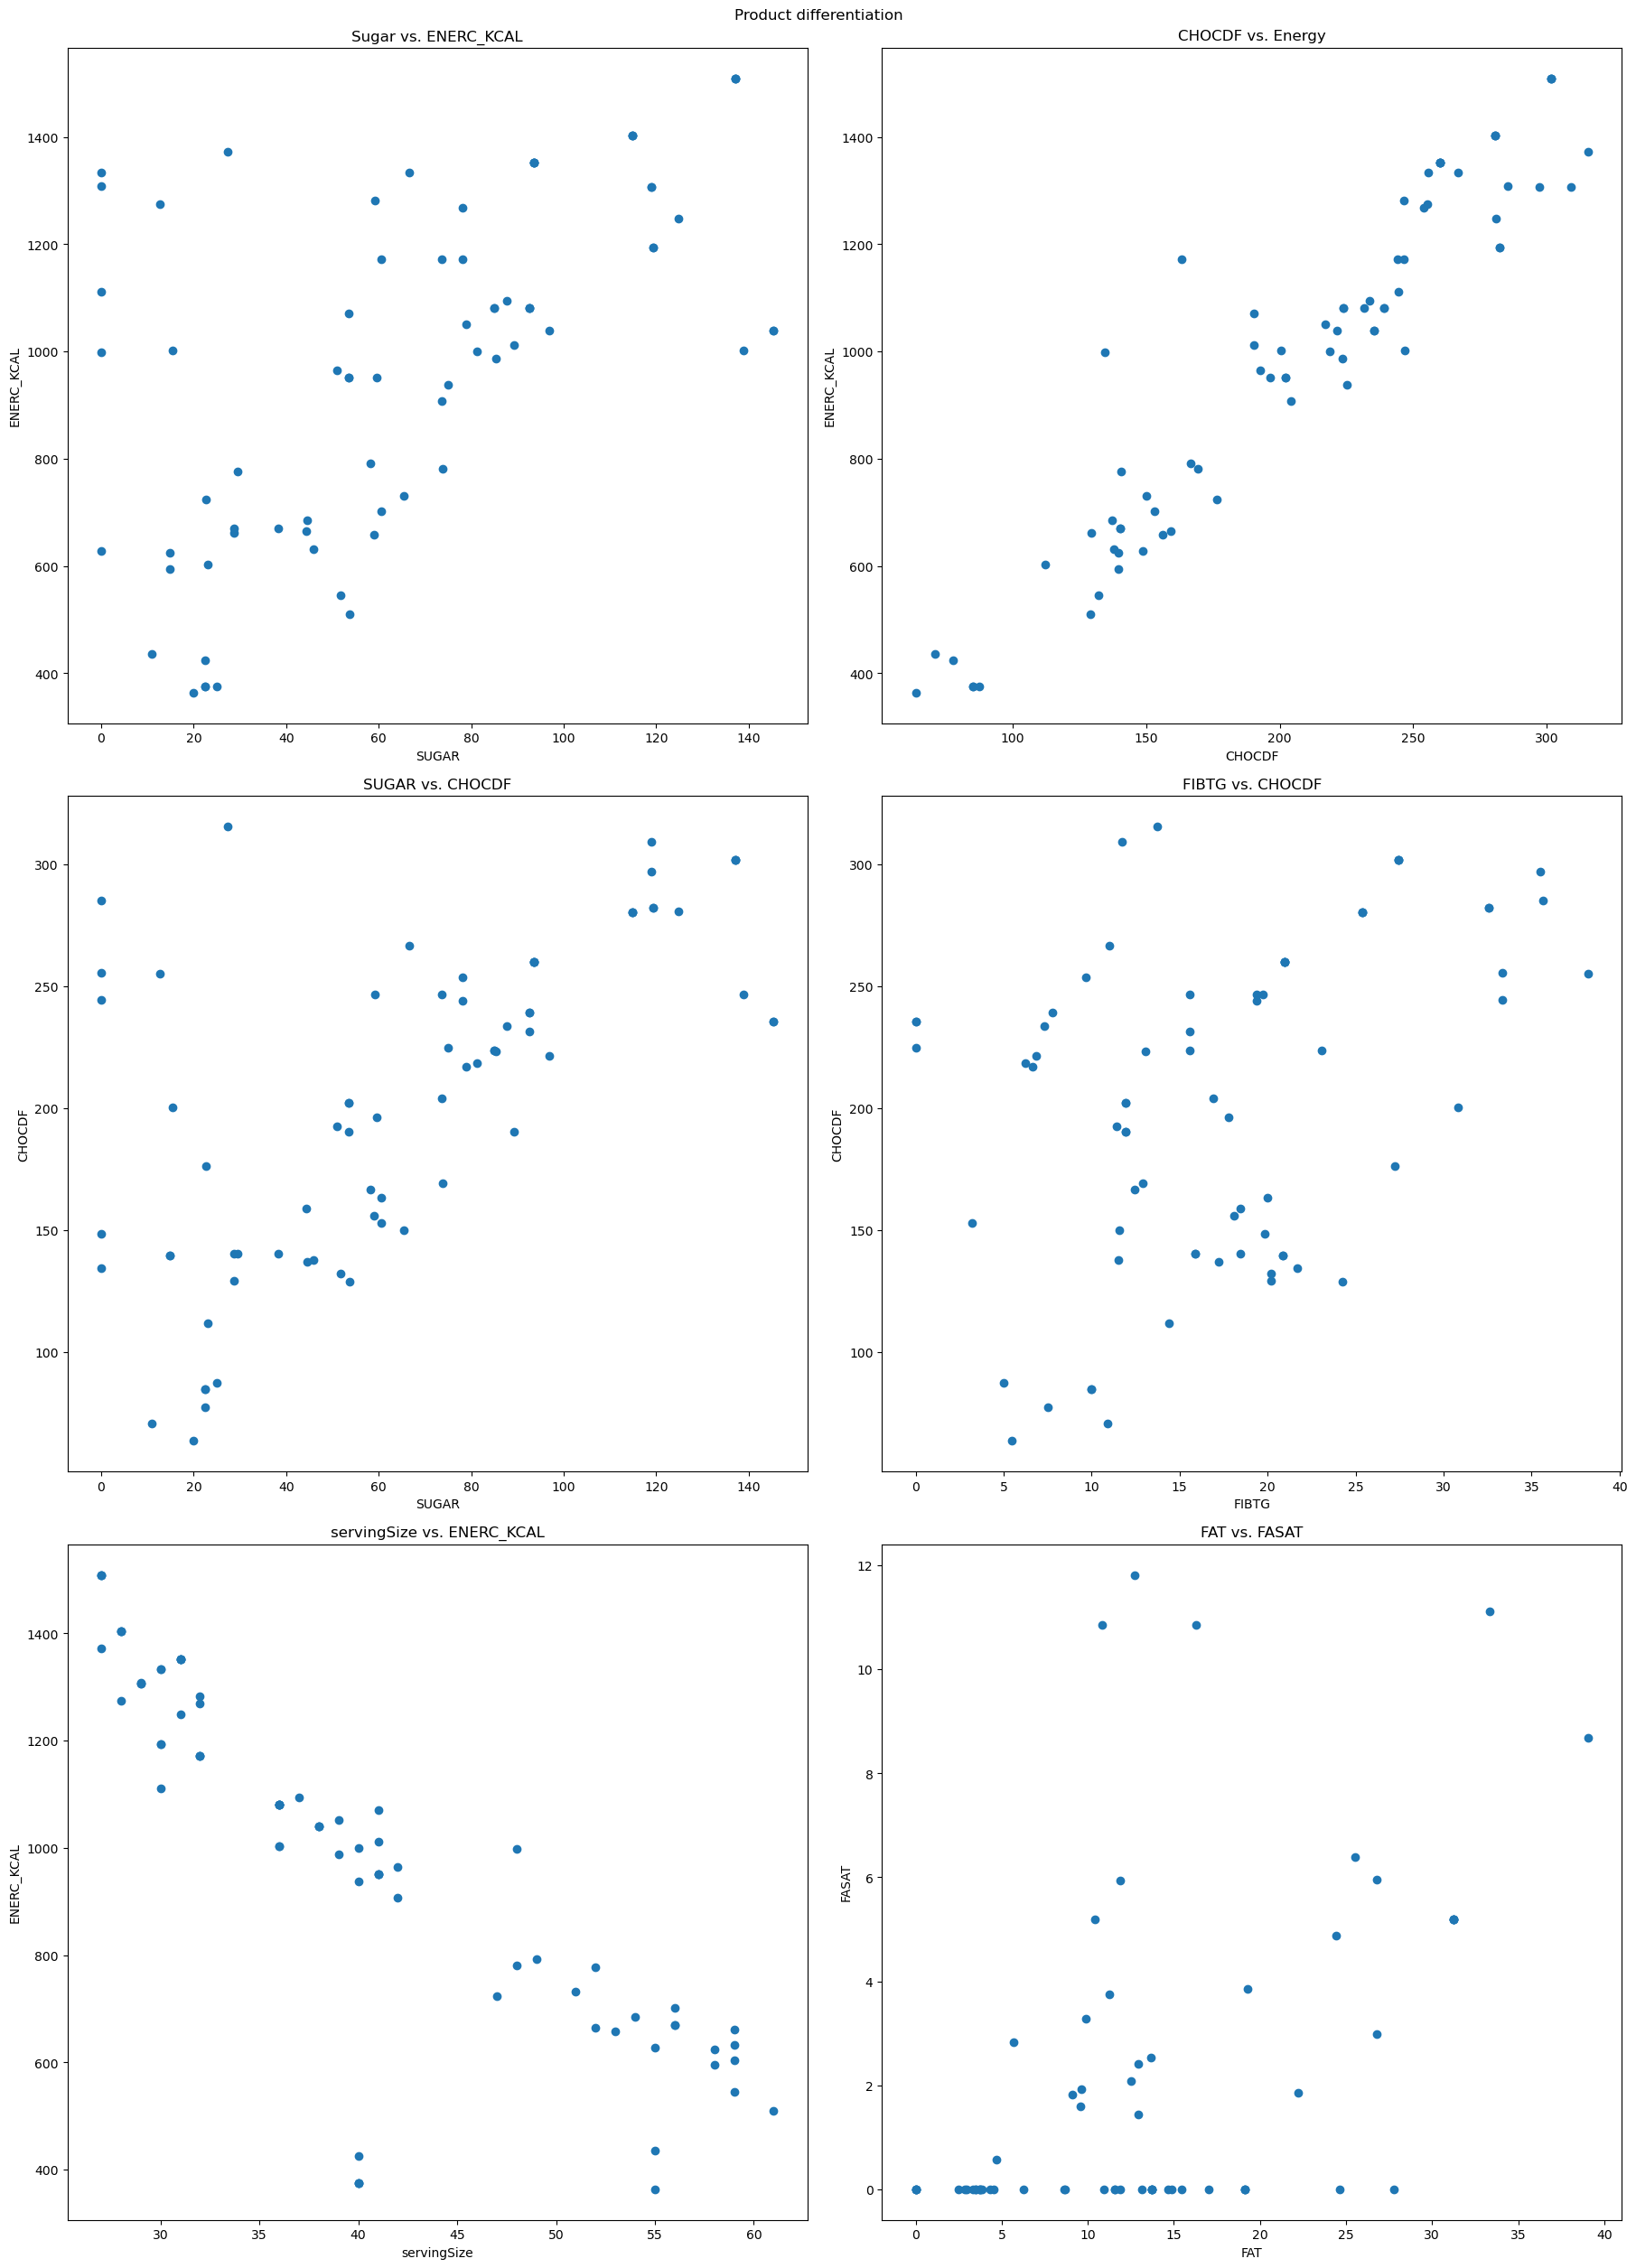

In [225]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(18,25), constrained_layout=True)

axs[0,0].scatter(dataFinal['SUGARgram'],dataFinal['ENERC_KCALgram'])
axs[0,0].set_title("Sugar vs. ENERC_KCAL")
axs[0,0].set_xlabel("SUGAR")
axs[0,0].set_ylabel("ENERC_KCAL")

axs[0,1].scatter(dataFinal["CHOCDFgram"], dataFinal['ENERC_KCALgram'])
axs[0,1].set_title("CHOCDF vs. Energy")
axs[0,1].set_xlabel("CHOCDF")
axs[0,1].set_ylabel("ENERC_KCAL")

axs[1,0].scatter(dataFinal["SUGARgram"], dataFinal['CHOCDFgram'])
axs[1,0].set_title("SUGAR vs. CHOCDF")
axs[1,0].set_xlabel("SUGAR")
axs[1,0].set_ylabel("CHOCDF")

axs[1,1].scatter(dataFinal["FIBTGgram"], dataFinal['CHOCDFgram'])
axs[1,1].set_title("FIBTG vs. CHOCDF")
axs[1,1].set_xlabel("FIBTG")
axs[1,1].set_ylabel("CHOCDF")

axs[2,1].scatter(dataFinal["FATgram"], dataFinal['FASATgram'])
axs[2,1].set_title("FAT vs. FASAT")
axs[2,1].set_xlabel("FAT")
axs[2,1].set_ylabel("FASAT")

axs[2,0].scatter(dataFinal["servingSize_gram"], dataFinal['ENERC_KCALgram'])
axs[2,0].set_title("servingSize vs. ENERC_KCAL")
axs[2,0].set_xlabel("servingSize")
axs[2,0].set_ylabel("ENERC_KCAL")



fig.suptitle('Product differentiation')
plt.show()

In [226]:
features = ['FATgram','ENERC_KCALgram']
small_df = dataFinal[features]

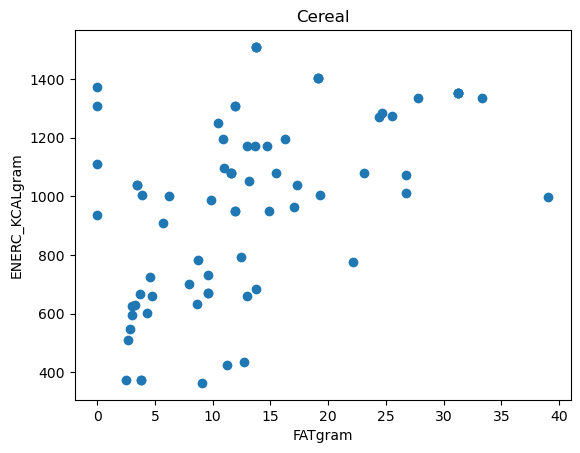

In [227]:
plt.scatter(data= dataFinal, x=features[0], y=features[1])
plt.title("Cereal")
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.show()

## 2.2 K-Means clustering
Using the K-means clustering technique analyze the degree of product differ-
entiation. Based on descriptive statistics, data availability, and scatter plots,
choose pairs of features (i.e., nutrition facts) on which you believe the sellers
differentiate themselves. Quantify your answer. You should try different K
parameters. Report the goodness of fit (total sum of errors).

In [260]:
def initialize_centroids(k, data):
    # This function creates k random centroids
    
    # k is an integer indicating the number of initial centroids to be created
    # data is a dataframe with the characteristics we are interested in

    n_cols = data.shape[1]  #number of columns
    
    #Determining the range of the columns in data:
    centroid_min = data.min()
    centroid_max = data.max()
    
    # drawing k random centroids in the min/max range and of the right number of columns 
    centroids = np.random.uniform(centroid_min,centroid_max,(k,n_cols))

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

In [263]:
data = df1[['FATgram','ENERC_KCALgram']] 

centroids = initialize_centroids(3, data) #drawing 3 random centroids
centroids

,FATgram,ENERC_KCALgram
0,0.097924,0.774852
1,0.082971,0.714368
2,0.045596,0.174727


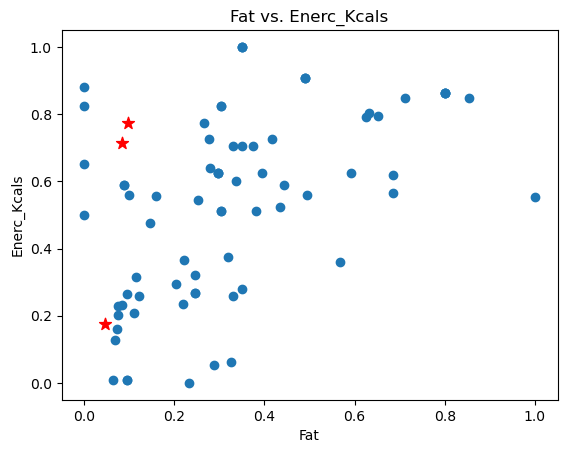

In [265]:
plt.scatter(df1['FATgram'], df1['ENERC_KCALgram'])
plt.title("Fat vs. Enerc_Kcals")
plt.xlabel("Fat")
plt.ylabel("Enerc_Kcals")

plt.scatter(centroids['FATgram'], centroids['ENERC_KCALgram'], s=80,c='red', marker = "*")

plt.show()

In [266]:
box = np.array(data.iloc[0])

print(f"1st product has {box[0]} grams of fat and {box[1]} grams of enerc_kcal per serving.")
c1 =np.array(centroids.iloc[0])
print(f"Centroid 1 has  {round(c1[0],1)} grams of fat and {round(c1[1],1)} grams of enerc_kcal per serving.")

1st product has 0.4900571550641741 grams of fat and 0.9080182149079146 grams of enerc_kcal per serving.
Centroid 1 has  0.1 grams of fat and 0.8 grams of enerc_kcal per serving.


In [269]:
type(box)

numpy.ndarray

In [270]:
def dist(a,b):  
    # a,b are two numpy arrays
    '''
    Given two Numpy Arrays, calculates the distance.
    '''
    d = np.sqrt(np.sum((a-b)**2))

    return d 

In [276]:
for i in range(3):
    c = np.array(centroids.iloc[i])
    d = dist(box,c)
    print(f"The distance between the first product and centroid # {i+1} is {round(d,2)}")

The distance between the first product and centroid # 1 is 0.41
The distance between the first product and centroid # 2 is 0.45
The distance between the first product and centroid # 3 is 0.86


In [277]:
def classify(box,centroids):
    # box - a numpy array
    # centroids - a dataframe with the centroids
    
    k = centroids.shape[0] #number of centroids 
    
    lowest = float('inf')  #setting the minimum distance to infinity at first
    cluster = 0 #initial value
    for i in range(k):
        c = np.array(centroids.iloc[i]) #translating the i'th line of centroids to a numpy array
        d = dist(box,c)
        if d < lowest:  #we found a new minimum
            lowest = d
            cluster = i
            
    return cluster,lowest

In [278]:
cl,di = classify(box,centroids)

In [279]:
print(f"The closest centroid is # {cl+1} ")

The closest centroid is # 1 


In [280]:
print(f"The closest centroid is # {cl+1} ")

The closest centroid is # 1 


In [281]:
def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0] # number of rows in the data frame
    k = centroids.shape[0] # number of centroids
    
    # we start with two empty lists:
    centroid_assign = [] #this list will contain the cendroid assigned to each observation
    centroid_dist = []   #this list will contain the distance of the observation from the assigned centroid


    for observation in range(n_observations):   #going over the observations
        
        # calculate closest centroid and error
        box = data.iloc[observation,:]   # Looking at the cereal box at location 'observation'
        cl,di = classify(box,centroids)   # finding the closest centroid
                
        # Assign values to lists
        centroid_assign.append(cl)
        centroid_dist.append(di)

    return (centroid_assign,centroid_dist)

data['centroid'], data['dist'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'dist']].head()

,centroid,dist
0,0,0.414128
1,0,0.706930
2,0,0.414128
3,0,0.338855
4,0,0.555270


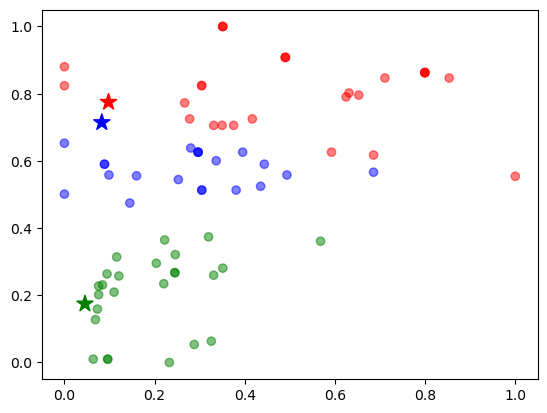

In [282]:
# adictionary that matches the number of the centroid to a color
colors = {0:'red', 1:'blue', 2:'green'} 

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = '*', s=150, 
           c = centroids.index.map(lambda x: colors[x]))
plt.show()

In [283]:
print(f"The total error so far: {round(data['dist'].sum(),2)}")

The total error so far: 22.87


In [284]:
data

,FATgram,ENERC_KCALgram,centroid,dist
0,0.490057,0.908018,0,0.414128
1,0.799381,0.862651,0,0.706930
2,0.490057,0.908018,0,0.414128
3,0.351166,1.000000,0,0.338855
4,0.652800,0.795756,0,0.555270
...,...,...,...,...
72,0.064000,0.009922,2,0.165829
73,0.232727,0.000000,2,0.256023
74,0.096000,0.009922,2,0.172341
75,0.325818,0.063502,2,0.301489


In [285]:
centroids = data.groupby('centroid').agg('mean').reset_index(drop = True).drop(['dist'], axis = 1)

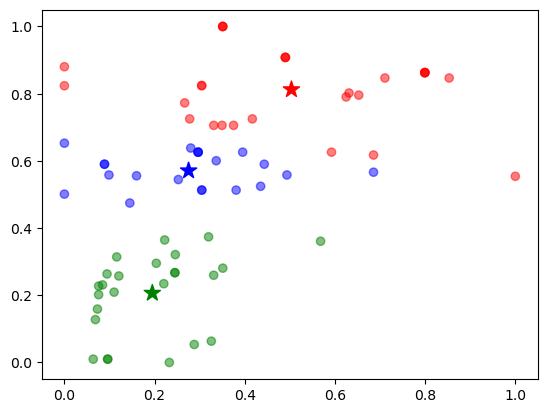

In [286]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = '*', s=150, 
           c = centroids.index.map(lambda x: colors[x]))
plt.show()

In [287]:
data['centroid'], data['dist'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'dist']].head()

,centroid,dist
0,0,0.096635
1,0,0.300115
2,0,0.096635
3,0,0.241727
4,0,0.150202


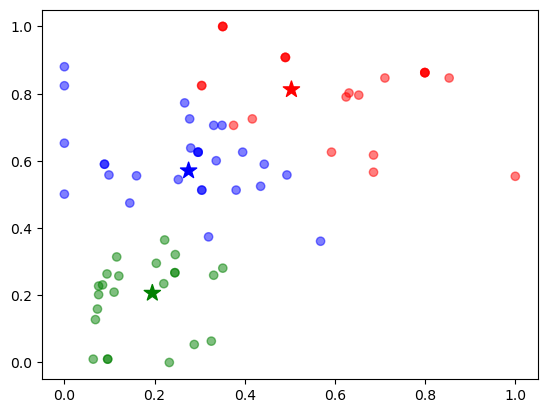

In [288]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = '*', s=150, 
           c = centroids.index.map(lambda x: colors[x]))
plt.show()

In [289]:
print(f"The total error so far: {round(data['dist'].sum(),2)}")

The total error so far: 13.1
